<a href="https://colab.research.google.com/github/meghachopra08/Object_Detection_Using_RCNN/blob/main/Cauliflower_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
path = "/content/drive/MyDrive/rcnn/cauliflower training images"
annot = "/content/drive/MyDrive/rcnn/cauliflower annotations"

In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

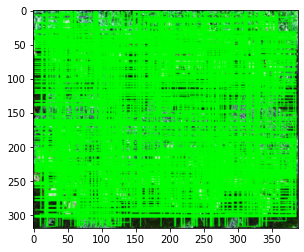

In [ ]:
cv2.setUseOptimized(True);
ss1 = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

im = cv2.imread(os.path.join(path,"image_part_15.jpg"))
ss1.setBaseImage(im)
ss1.switchToSelectiveSearchFast()
rects = ss1.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

image_part_1.jpg


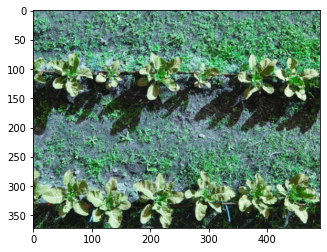

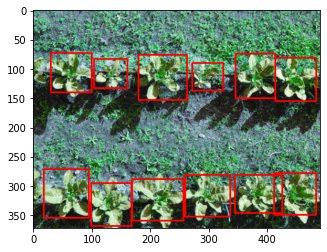

In [ ]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [ ]:
train_images=[]
train_labels=[]
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("image"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 image_part_1.jpg
1 image_part_2.jpg
2 image_part_3.jpg
3 image_part_4.jpg
4 image_part_5.jpg
5 image_part_6.jpg
6 image_part_7.jpg
7 image_part_8.jpg
8 image_part_9.jpg
9 image_part_10.jpg
10 image_part_11.jpg
11 image_part_12.jpg
12 image_part_13.jpg
13 image_part_14.jpg
14 image_part_15.jpg


In [ ]:
print(train_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 

In [ ]:
print(train_images)

[array([[[117, 156, 158],
        [117, 156, 158],
        [117, 156, 158],
        ...,
        [ 80, 101, 110],
        [ 80, 101, 110],
        [ 80, 101, 110]],

       [[117, 156, 158],
        [117, 156, 158],
        [117, 156, 158],
        ...,
        [ 80, 101, 110],
        [ 80, 101, 110],
        [ 80, 101, 110]],

       [[117, 156, 158],
        [117, 156, 158],
        [117, 156, 158],
        ...,
        [ 80, 101, 110],
        [ 80, 101, 110],
        [ 80, 101, 110]],

       ...,

       [[116, 147, 155],
        [116, 147, 155],
        [116, 147, 155],
        ...,
        [ 94, 130, 141],
        [ 94, 130, 141],
        [ 94, 130, 141]],

       [[116, 147, 155],
        [116, 147, 155],
        [116, 147, 155],
        ...,
        [ 94, 130, 141],
        [ 94, 130, 141],
        [ 94, 130, 141]],

       [[116, 147, 155],
        [116, 147, 155],
        [116, 147, 155],
        ...,
        [ 94, 130, 141],
        [ 94, 130, 141],
        [ 94, 130, 141]

In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(inputs = vggmodel.input, outputs = predictions)
opt = Adam(lr=0.0001)
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 50, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 232s 22s/step - loss: 1.3708 - accuracy: 0.6598 - val_loss: 0.3744 - val_accuracy: 0.8772

Epoch 00001: val_loss improved from inf to 0.37443, saving model to ieeercnn_vgg16_1.h5
Epoch 2/50
10/10 [==============================] - 213s 22s/step - loss: 0.1763 - accuracy: 0.9556 - val_loss: 0.3967 - val_accuracy: 0.8947

Epoch 00002: val_loss did not improve from 0.37443
Epoch 3/50
10/10 [==============================] - 212s 21s/step - loss: 0.0764 - accuracy: 0.9753 - val_loss: 0.1452 - val_accuracy: 0.9298

Epoch 00003: val_loss improved from 0.37443 to 0.14524, saving model to ieeercnn_vgg16_1.h5
Epoch 4/50
10/10 [==============================] - 210s 21s/step - loss: 0.1351 - accuracy: 0.9603 - val_loss: 0.0444 - val_accuracy: 0.9825

Epoch 00004: val_loss improved from 0.14524 to 0.04437, saving model to ieeercnn_vgg16_1.h5
Epoch 5/50
10/10 [==============================] - 214s 22s/step - loss: 0.0343 - accuracy: 0.9896 - val

In [ ]:
path1 = "/content/drive/MyDrive/rcnn/cauliflower test1"

104 72 224 114
0 45 92 96


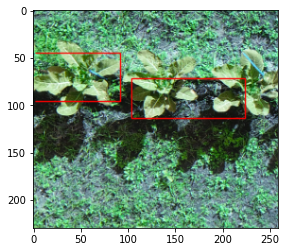

In [ ]:
z=0
for e,i in enumerate(os.listdir(path1)):
    if i.startswith("image"):
        z += 1
        img = cv2.imread(os.path.join(path1,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        boxes = []
        count = 0
        for e,result in enumerate(ssresults):
            if e < 50:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.95:
                  boxes.append([x,y,w,h])
                  count+=1
                  cv2.rectangle(imout, (x, y), (x+w, y+h), (255, 0 , 0), 1 , cv2.LINE_AA)
        for b in boxes:
          x, y, w, h = b
          print(x,y,x+w,y+h)

        plt.figure()
        plt.imshow(imout)

In [ ]:
path2 = "/content/drive/MyDrive/rcnn/cauliflower test2"

208 61 271 105
35 46 87 111
290 45 334 115
155 227 198 299
0 47 61 113
80 19 148 77
155 224 334 299
6 222 55 304
203 250 282 292
83 244 135 287


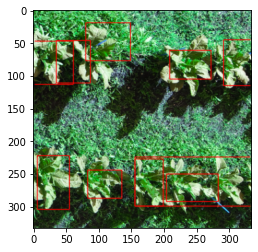

In [ ]:
z=0
for e,i in enumerate(os.listdir(path2)):
    if i.startswith("image"):
        z += 1
        img = cv2.imread(os.path.join(path2,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        boxes = []
        count = 0
        for e,result in enumerate(ssresults):
            if e < 100:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.95:
                  boxes.append([x,y,w,h])
                  count+=1
                  cv2.rectangle(imout, (x, y), (x+w, y+h), (255, 0 , 0), 1 , cv2.LINE_AA)
        for coord in boxes:
          x, y, w, h = coord
          print(x,y,x+w,y+h)
        plt.figure()
        plt.imshow(imout)

In [ ]:
path3 = "/content/drive/MyDrive/rcnn/cauliflower test3"

139 23 236 118
185 206 276 286
234 210 315 302
358 151 468 277
281 31 374 115
0 187 138 287
61 48 154 124


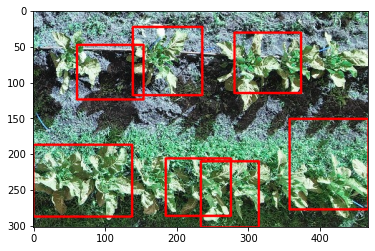

In [ ]:
z=0
for e,i in enumerate(os.listdir(path3)):
    if i.startswith("image"):
        z += 1
        img = cv2.imread(os.path.join(path3,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        boxes = []
        count = 0
        for e,result in enumerate(ssresults):
            if e < 200:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.80:
                  boxes.append([x,y,w,h])
                  count+=1
                  cv2.rectangle(imout, (x, y), (x+w, y+h), (255, 0 , 0), 2 , cv2.LINE_AA)
        for boxx in boxes:
          x, y, w, h = boxx
          print(x,y,x+w,y+h)
        plt.figure()
        plt.imshow(imout)